In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from math import sqrt 
from PIL import Image
from matplotlib import cm
from matplotlib import pyplot as plt

from keras.utils import plot_model, to_categorical, np_utils
from keras.preprocessing.image import ImageDataGenerator 

import pandas as pd

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.models import load_model
import cv2

In [3]:
data = pd.read_csv(r"C:\Users\manav\Downloads\fer2013.csv")

In [4]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [6]:
num_classes = 7
width = 48
height = 48
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

In [7]:
data.Usage.value_counts() 

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [8]:
depth = 1
height = int(sqrt(len(data.pixels[0].split()))) 
width = int(height)

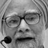

Angry


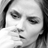

Fear


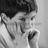

Sad


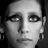

Neutral


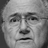

Fear


In [9]:
for i in range(1,6): 
    array = np.mat(data.pixels[i]).reshape(height, width) 
    image = Image.fromarray(np.uint8(array)) 
    display(image)
    #plt.imshow(image)
    print(emotion_labels[data.emotion[i]])

In [10]:
train_set = data[(data.Usage == 'Training')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
num_train = X_train.shape[0]
y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 

In [11]:
val_set = data[(data.Usage == 'PublicTest')]
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
num_val = X_val.shape[0]
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes)

In [12]:
test_set = data[(data.Usage == 'PrivateTest')] 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
num_test = X_test.shape[0]
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes) 

In [13]:
# construct the image generator for data augmentation
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator( 
    rescale=1./255
    )
datagen.fit(X_train)
batch_size = 64

C:\Users\manav\AppData\Local\Temp\ipykernel_11072\2156870284.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(330 + 1 + i)


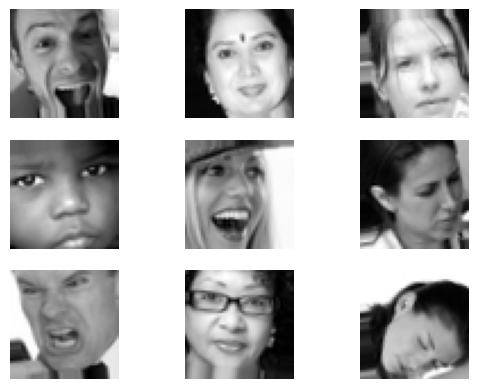

In [14]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9): 
        plt.axis('off') 
        plt.subplot(330 + 1 + i) 
        plt.imshow(X_batch[i].reshape(48, 48), cmap=plt.get_cmap('gray'))
    plt.axis('off') 
    plt.show() 
    break

In [15]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size) 

In [16]:
##FER Model
#1st Layer Input
#2nd Layer Con2D
#3rd Layer Con2D
#4th Layer Con2D
#5th Layer Con2D
#6th Layer Flattening/Output Layer 
# first input model
visible = tf.keras.layers.Input(shape=(48,48,1), name='input')
num_classes = 7
#the 1-st block
conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
conv1_1 = BatchNormalization()(conv1_1)
conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
conv1_2 = BatchNormalization()(conv1_2)
pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)

#the 2-nd block
conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
conv2_1 = BatchNormalization()(conv2_1)
conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
conv2_2 = BatchNormalization()(conv2_2)
conv2_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
conv2_2 = BatchNormalization()(conv2_3)
pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_3)
drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)

#the 3-rd block
conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
conv3_1 = BatchNormalization()(conv3_1)
conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
conv3_2 = BatchNormalization()(conv3_2)
conv3_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3')(conv3_2)
conv3_3 = BatchNormalization()(conv3_3)
conv3_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4')(conv3_3)
conv3_4 = BatchNormalization()(conv3_4)
pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_4)
drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)

#the 4-th block
conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
conv4_1 = BatchNormalization()(conv4_1)
conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
conv4_2 = BatchNormalization()(conv4_2)
conv4_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(conv4_2)
conv4_3 = BatchNormalization()(conv4_3)
conv4_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(conv4_3)
conv4_4 = BatchNormalization()(conv4_4)
pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_4)
drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)

#the 5-th block
conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
conv5_1 = BatchNormalization()(conv5_1)
conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
conv5_2 = BatchNormalization()(conv5_2)
conv5_3 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3')(conv5_2)
conv5_3 = BatchNormalization()(conv5_3)
conv5_4 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4')(conv5_3)
conv5_3 = BatchNormalization()(conv5_3)
pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_4)
drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)

#Flatten and output
flatten = Flatten(name = 'flatten')(drop5_1)
ouput = Dense(num_classes, activation='softmax', name = 'output')(flatten)

In [17]:
# create model 
model = Model(inputs =visible, outputs = ouput)

In [18]:
# summary layers
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 conv1_1 (Conv2D)            (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv1_2 (Conv2D)            (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 pool1_1 (MaxPooling2D)      (None, 24, 24, 64)        0     

In [20]:
opt = Adam(lr=0.0001, epsilon=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

In [23]:
from keras.callbacks import ModelCheckpoint
filepath="D:\Code\FERS-master\weights_min_loss.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [24]:
# we iterate 200 times over the entire training set 
num_epochs = 1
history = model.fit_generator(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=num_epochs,  
                    verbose=2,  
                    callbacks=callbacks_list,
                    validation_data=val_flow,  
                    validation_steps=len(X_val) / batch_size)

C:\Users\manav\AppData\Local\Temp\ipykernel_11072\938854699.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_flow,



Epoch 1: val_loss improved from inf to 2.11092, saving model to D:\Code\FERS-master\weights_min_loss.hdf5
448/448 - 1799s - loss: 1.6620 - accuracy: 0.3389 - val_loss: 2.1109 - val_accuracy: 0.3054 - 1799s/epoch - 4s/step


<Figure size 640x480 with 0 Axes>

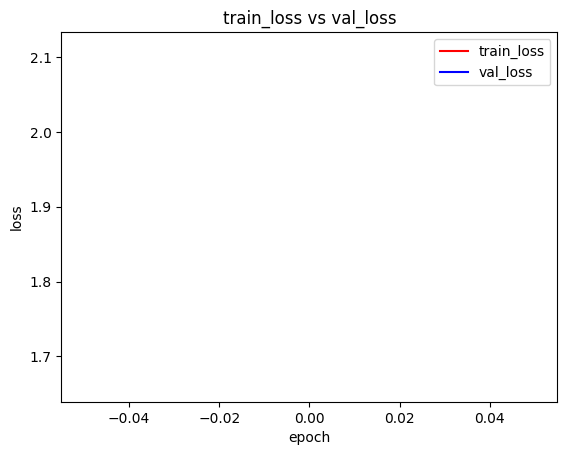

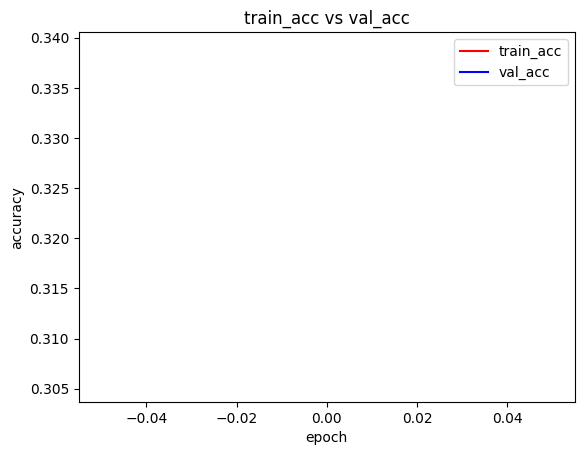

<Figure size 640x480 with 0 Axes>

In [25]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()

In [30]:
# Save entire model to a HDF5 file
model.save('D:\Code\FERS-master\weights_min_loss.hdf5')

In [31]:
# Load entire trained model as a HDF5 file
model = load_model('D:\Code\FERS-master\weights_min_loss.hdf5')

In [32]:
loss = model.evaluate_generator(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

C:\Users\manav\AppData\Local\Temp\ipykernel_11072\1878331756.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss = model.evaluate_generator(test_flow, steps=len(X_test) / batch_size)


Test Loss 2.0561325550079346
Test Acc: 0.3109501302242279


In [33]:
loss = model.evaluate(X_test/255., y_test) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 61s 535ms/step - loss: 2.0561 - accuracy: 0.3110
Test Loss 2.056133270263672
Test Acc: 0.3109501302242279


In [34]:
loss = model.evaluate(X_val/255., y_val) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 60s 528ms/step - loss: 2.1109 - accuracy: 0.3054
Test Loss 2.11091947555542
Test Acc: 0.3053775429725647


In [35]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [36]:
y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 60s 527ms/step


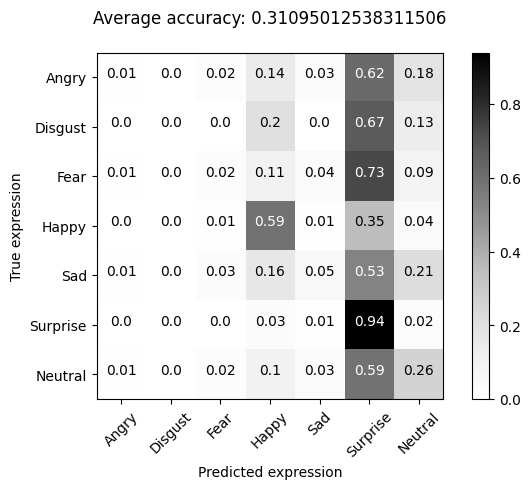

In [37]:
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Greys,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [6]:
## Front - 1, Back - 0
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model = load_model('D:\Code\FERS-master\weights_min_loss.hdf5')
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 1)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        #print(cropped_img/255., " Type: ", type(cropped_img))
        prediction = model.predict(cropped_img/255.)
        emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
        cv2.putText(frame, emotion_labels[int(np.argmax(prediction))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 54ms/step
